In [1]:
import math 
import numpy

# ΙΟΥΝΙΟΣ 2021

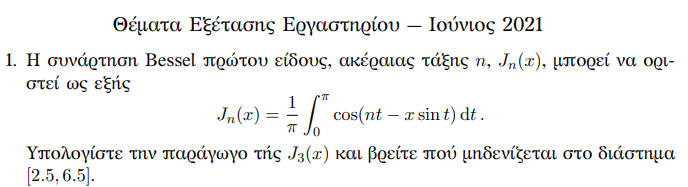

In [2]:
## Γενική συνάρτηση trapezoidal rule (όπως θα έγραφες εσύ)
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n 
    total = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        total += f(a + i * h)
    return total * h

# J3(x) με χρήση trapezoidal_rule
def J3(x):
    def integrand(t):
        return math.cos(3 * t - x * math.sin(t))
    return trapezoidal_rule(integrand, 0.0, math.pi, 200) / math.pi

def dJ3_dx(x, h=1e-5):
    return (J3(x + h) - J3(x - h)) / (2 * h)

def secant(x1, x2, tol, f):
    f1 = f(x1)
    f2 = f(x2)
    while abs(f2) > tol:
        x = x2 - f2 * (x2 - x1) / (f2 - f1)
        x1, f1 = x2, f2
        x2, f2 = x, f(x)
    return x2

root = secant(2.5, 6.5, 1e-8, dJ3_dx)
print("Το J3'(x) μηδενίζεται στο x =", root)

Το J3'(x) μηδενίζεται στο x = 4.201188944382491


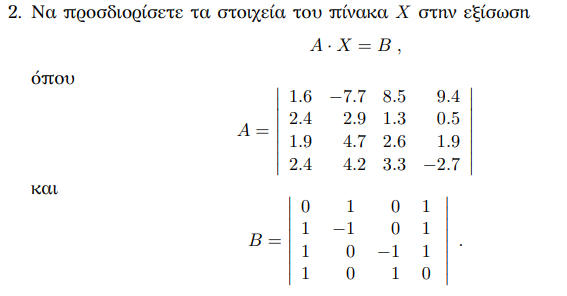

In [5]:
#ΜΕ GAUSS ME PIVOTING!
# Οι πίνακες της άσκησης
A = np.array([
    [1.6, -7.7, 8.5, 9.4],
    [2.4, 2.9, 1.3, 0.5],
    [1.9, 4.7, 2.6, 1.9],
    [2.4, 4.2, 3.3, -2.7]
], dtype=float)

B = np.array([
    [0, 1, 0, 1],
    [1, -1, 0, 1],
    [1, 0, -1, 1],
    [1, 0, 1, 0]
], dtype=float)

# Εδώ είναι οι δικές σου συναρτήσεις (copy-paste από το κελί σου)
def normalize_rows(a, b, k):
    n = len(b)
    for i in range(k, n):
        max_val = abs(b[i])
        for j in range(k, n):
            if abs(a[i, j]) > max_val:
                max_val = abs(a[i, j])
        for j in range(k, n):
            a[i, j] /= max_val
        b[i] /= max_val

def swap_rows(a, b, k, p):
    a[[k, p]] = a[[p, k]]
    b[k], b[p] = b[p], b[k]

def pivot(a, b, k):
    normalize_rows(a, b, k)
    n = len(b)
    best = k
    for i in range(k + 1, n):
        if abs(a[i, k]) > abs(a[best, k]):
            best = i
    if best != k:
        swap_rows(a, b, k, best)

def forward(a, b):
    n = len(b)
    for k in range(n - 1):
        pivot(a, b, k)
        for i in range(k + 1, n):
            factor = -a[i, k] / a[k, k]
            for j in range(k, n):
                a[i, j] += factor * a[k, j]
            b[i] += factor * b[k]

def back(a, b, x):
    n = len(b)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= a[i, j] * x[j]
        x[i] /= a[i, i]

def solve_gauss(a, b, x):
    forward(a, b)
    back(a, b, x)

# Επίλυση για κάθε στήλη του B
n = A.shape[0]
X = np.zeros((n, n))
for col in range(n):
    a = A.copy()
    b = B[:, col].copy()
    x = np.zeros(n)
    solve_gauss(a, b, x)
    X[:, col] = x

print("Ο πίνακας X που λύνει το A·X = B είναι:")
print(X)

Ο πίνακας X που λύνει το A·X = B είναι:
[[ 0.32166318 -0.73758794  0.33199607  0.3968936 ]
 [ 0.08075171  0.09958888 -0.25730263  0.05080573]
 [-0.01399955  0.38289879  0.09792351 -0.16524105]
 [ 0.02405566 -0.03273027 -0.355827    0.22986418]]


In [7]:
# elegxos oti einai swsto mesw etoimis sunartisis
# Λύση του συστήματος: X = A⁻¹ * B
X = np.linalg.solve(A, B)
# Εκτύπωση του αποτελέσματος
print("Ο πίνακας X είναι:")
print(np.round(X, decimals=4))  # Στρογγυλοποίηση για αναγνωσιμότητα

Ο πίνακας X είναι:
[[ 0.3217 -0.7376  0.332   0.3969]
 [ 0.0808  0.0996 -0.2573  0.0508]
 [-0.014   0.3829  0.0979 -0.1652]
 [ 0.0241 -0.0327 -0.3558  0.2299]]


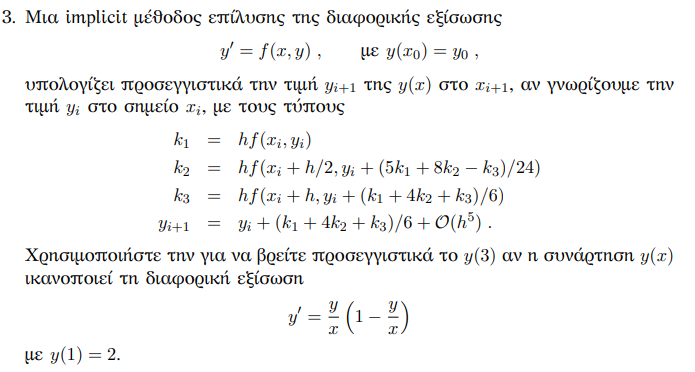

In [16]:
import math

# Η διαφορική εξίσωση y' = y/x * (1 - y/x)
def dydx(x, y):
    return y / x * (1 - y / x)

# Μέθοδος της τέμνουσας (όπως στα παραδείγματά σου)
def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)
    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)
    return x2

# Ένα βήμα της implicit μεθόδου Butcher
def butcher_step(xi, yi, h):
    def F(y_next):
        k1 = h * dydx(xi, yi)
        k2_guess = k1
        k3_guess = k1
        for _ in range(3):
            k2 = h * dydx(xi + h/2, yi + (5*k1 + 8*k2_guess - k3_guess)/24)
            k3 = h * dydx(xi + h, yi + (k1 + 4*k2 + k3_guess)/6)
            k2_guess = k2
            k3_guess = k3
        return yi + (k1 + 4*k2 + k3)/6 - y_next

    y1 = yi
    y2 = yi + h * dydx(xi, yi)
    return secant_method(y1, y2, 1e-10, F)

# Κύριο πρόγραμμα: Υπολογίζει και εμφανίζει καθαρά το y(3)
def main():
    x0 = 1.0
    y0 = 2.0
    x_end = 3.0
    h = 0.1
    n_steps = int((x_end - x0) / h)

    x = x0
    y = y0

    for _ in range(n_steps):
        y = butcher_step(x, y, h)
        x += h

    print("\n-----------------------------")
    print(f"Τελική απάντηση: y(3) = {y:.10f}")
    print("-----------------------------")

main()


-----------------------------
Τελική απάντηση: y(3) = 1.8766349678
-----------------------------


# ΣΕΠΤΕΜΒΡΙΟΣ 2020

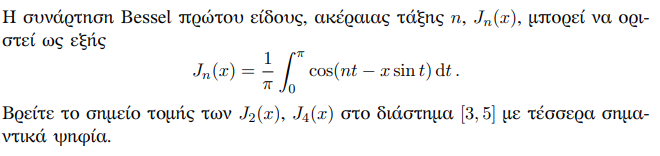

In [17]:
import math

# ΔΙΚΗ ΣΟΥ ΣΥΝΑΡΤΗΣΗ τραπεζίου
def trapezoidal_rule(func, start, end, intervals):
    step = (end - start) / intervals
    total = (func(start) + func(end)) / 2.0
    for i in range(1, intervals):
        total += func(start + i * step)
    return total * step

# Υλοποίηση του J_n(x) με βάση τον ορισμό
def Jn(n, x):
    def integrand(t):
        return math.cos(n * t - x * math.sin(t))
    return trapezoidal_rule(integrand, 0.0, math.pi, 200) / math.pi

# Συνάρτηση που μηδενίζεται στο σημείο τομής J2(x) - J4(x)
def diff_J2_J4(x):
    return Jn(2, x) - Jn(4, x)

# ΔΙΚΗ ΣΟΥ ΜΕΘΟΔΟΣ ΤΕΜΝΟΥΣΑΣ (secant)
def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)
    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)
    return x2

# Κύριο πρόγραμμα: Βρίσκει το σημείο τομής J2(x) και J4(x) στο [3, 5]
def main():
    root = secant_method(3.0, 5.0, 1e-5, diff_J2_J4)
    print("\n-----------------------------")
    print(f"Σημείο τομής J2(x) και J4(x) στο [3,5]: x = {root:.4f}")
    print("-----------------------------")

main()


-----------------------------
Σημείο τομής J2(x) και J4(x) στο [3,5]: x = 4.2012
-----------------------------


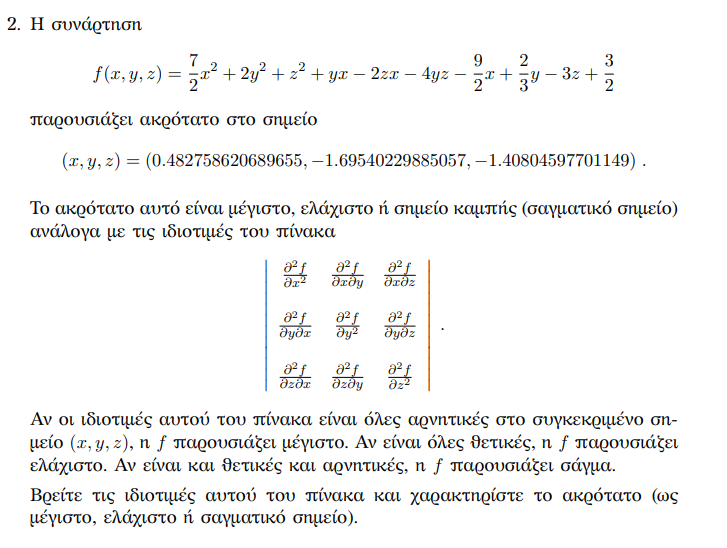

In [20]:
# ΔΕΝ ΚΑΤΑΛΑΒΑ ΤΙΠΟΤΑ
# Η συνάρτηση f(x, y, z)
def f(x, y, z):
    return (7/2)*x**2 + 2*y**2 + z**2 + y*x - 2*x*z - 4*y*z - (9/2)*x + (2/3)*y - 3*z + 3/2

# Δεύτερες μερικές παράγωγοι με διαφορές (όπως στα Taylor/παρεμβολή)
def d2f_dx2(x, y, z, h=1e-5):
    return (f(x+h, y, z) - 2*f(x, y, z) + f(x-h, y, z)) / (h*h)

def d2f_dy2(x, y, z, h=1e-5):
    return (f(x, y+h, z) - 2*f(x, y, z) + f(x, y-h, z)) / (h*h)

def d2f_dz2(x, y, z, h=1e-5):
    return (f(x, y, z+h) - 2*f(x, y, z) + f(x, y, z-h)) / (h*h)

def d2f_dxdy(x, y, z, h=1e-5):
    return (f(x+h, y+h, z) - f(x+h, y-h, z) - f(x-h, y+h, z) + f(x-h, y-h, z)) / (4*h*h)

def d2f_dxdz(x, y, z, h=1e-5):
    return (f(x+h, y, z+h) - f(x+h, y, z-h) - f(x-h, y, z+h) + f(x-h, y, z-h)) / (4*h*h)

def d2f_dydz(x, y, z, h=1e-5):
    return (f(x, y+h, z+h) - f(x, y+h, z-h) - f(x, y-h, z+h) + f(x, y-h, z-h)) / (4*h*h)

def main():
    # Το δοσμένο σημείο
    x0 = 0.482758620689655
    y0 = -1.69540229885057
    z0 = -1.48004597701149

    # Υπολογισμός Hessian με διαφορές
    a = d2f_dx2(x0, y0, z0)
    b = d2f_dy2(x0, y0, z0)
    c = d2f_dz2(x0, y0, z0)
    d = d2f_dxdy(x0, y0, z0)
    e = d2f_dxdz(x0, y0, z0)
    f_ = d2f_dydz(x0, y0, z0)

    # Εμφάνιση πίνακα Hessian
    print("Hessian:")
    print(f"[{a:.2f} {d:.2f} {e:.2f}]")
    print(f"[{d:.2f} {b:.2f} {f_:.2f}]")
    print(f"[{e:.2f} {f_:.2f} {c:.2f}]")

    # --- Κριτήριο 1: ΜΟΝΟ διαγώνια στοιχεία ---
    print("\nΚριτήριο διαγωνίων:")
    if a > 0 and b > 0 and c > 0:
        print("Πιθανό ελάχιστο (όλες οι διαγώνιες θετικές)")
    elif a < 0 and b < 0 and c < 0:
        print("Πιθανό μέγιστο (όλες οι διαγώνιες αρνητικές)")
    else:
        print("Σαγματικό σημείο (διαγώνιες με διαφορετικό πρόσημο)")

    # --- Κριτήριο 2: Sylvester (κύριες ανηγμένες ορίζουσες) ---
    D1 = a
    D2 = a*b - d*d
    D3 = (a*b*c + 2*d*e*f_ - a*f_**2 - b*e**2 - c*d**2)

    print("\nΚριτήριο Sylvester (κύριες ανηγμένες ορίζουσες):")
    print(f"D1 = {D1:.4f}, D2 = {D2:.4f}, D3 = {D3:.4f}")

    if D1 > 0 and D2 > 0 and D3 > 0:
        print("Το ακρότατο είναι ελάχιστο (όλες οι ορίζουσες θετικές).")
    elif D1 < 0 and D2 > 0 and D3 < 0:
        print("Το ακρότατο είναι μέγιστο (D1<0, D2>0, D3<0).")
    else:
        print("Το ακρότατο είναι σημείο καμπής (σαγματικό).")

main()

Hessian:
[7.00 1.00 -2.00]
[1.00 4.00 -4.00]
[-2.00 -4.00 2.00]

Κριτήριο διαγωνίων:
Πιθανό ελάχιστο (όλες οι διαγώνιες θετικές)

Κριτήριο Sylvester (κύριες ανηγμένες ορίζουσες):
D1 = 7.0000, D2 = 27.0002, D3 = -57.9993
Το ακρότατο είναι σημείο καμπής (σαγματικό).


# ΙΟΥΝΙΟΣ 2020

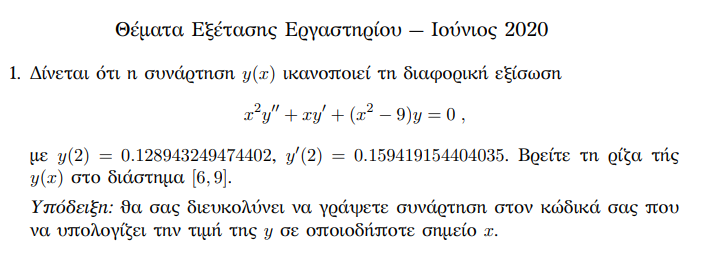

In [23]:
import math

# ΔΙΚΗ ΣΟΥ ΜΕΘΟΔΟΣ ΤΕΜΝΟΥΣΑΣ
def secant_method(x1, x2, tolerance, function):
    f1 = function(x1)
    f2 = function(x2)
    while abs(f2) > tolerance:
        x = (x2 * f1 - x1 * f2) / (f1 - f2)
        x1, f1 = x2, f2
        x2 = x
        f2 = function(x2)
    return x2

# Runge-Kutta 4ης τάξης για σύστημα 2 εξισώσεων
def rk4_step(x, y1, y2, h):
    # y1 = y, y2 = y'
    def f1(x, y1, y2):
        return y2
    def f2(x, y1, y2):
        return -(x * y2 + (x**2 - 9) * y1) / (x**2)

    k1_1 = h * f1(x, y1, y2)
    k1_2 = h * f2(x, y1, y2)

    k2_1 = h * f1(x + h/2, y1 + k1_1/2, y2 + k1_2/2)
    k2_2 = h * f2(x + h/2, y1 + k1_1/2, y2 + k1_2/2)

    k3_1 = h * f1(x + h/2, y1 + k2_1/2, y2 + k2_2/2)
    k3_2 = h * f2(x + h/2, y1 + k2_1/2, y2 + k2_2/2)

    k4_1 = h * f1(x + h, y1 + k3_1, y2 + k3_2)
    k4_2 = h * f2(x + h, y1 + k3_1, y2 + k3_2)

    y1_next = y1 + (k1_1 + 2*k2_1 + 2*k3_1 + k4_1) / 6
    y2_next = y2 + (k1_2 + 2*k2_2 + 2*k3_2 + k4_2) / 6
    return y1_next, y2_next

# Υπολογίζει y(x) για δοσμένο x με βήμα h
def solve_ode(x_target, h=0.01):
    x = 2.0
    y1 = 0.128943249474402
    y2 = 0.159419154404035
    while x < x_target:
        step = min(h, x_target - x)
        y1, y2 = rk4_step(x, y1, y2, step)
        x += step
    return y1

# Συνάρτηση που επιστρέφει y(x)
def y_of_x(x):
    return solve_ode(x)

# Κύριο πρόγραμμα
def main():
    root = secant_method(6.0, 9.0, 1e-8, y_of_x)
    print("\n-----------------------------")
    print(f"Ρίζα της y(x) στο [6,9]: x = {root:.8f}")
    print("-----------------------------")

main()


-----------------------------
Ρίζα της y(x) στο [6,9]: x = 22.58272959
-----------------------------


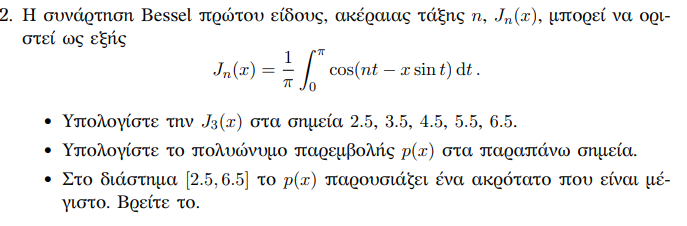